In [7]:
## import necessary libraries and packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [8]:
data_file = "DXSUM_PDXCONV_ADNIALL_09Dec2023.csv"
df_diagnosis = pd.read_csv(data_file)

In [9]:
len(df_diagnosis)

13508

In [10]:
# Use ADNI 1 data only.
df_diagnosis = df_diagnosis[(df_diagnosis['Phase'] == 'ADNI1')]

In [11]:
len(df_diagnosis)

3868

In [12]:
df_diagnosis.isna().sum()

Phase              0
ID                 0
RID                0
PTID               0
SITEID             0
VISCODE            0
VISCODE2           0
VISDATE            0
USERDATE           0
USERDATE2       3799
EXAMDATE           0
DXCHANGE        3868
DXCURREN           0
DXCONV             0
DXCONTYP           0
DXREV              0
DXNORM             0
DXNODEP            0
DXMCI              0
DXMDES             0
DXMPTR1            0
DXMPTR2            0
DXMPTR3            0
DXMPTR4            0
DXMPTR5            0
DXMPTR6            0
DXMDUE             0
DXMOTHET           0
DXDSEV          3868
DXDDUE          3868
DXAD               0
DXADES             0
DXAPP              0
DXAPROB            0
DXAPOSS            0
DXPARK             0
DXPDES             0
DXPCOG             0
DXPATYP            0
DXDEP           3868
DXOTHDEM           0
DXODES             0
DXCONFID           0
DIAGNOSIS       3868
update_stamp       0
dtype: int64

In [13]:
df_diagnosis.dropna(axis=1, how='any')

,Phase,ID,RID,PTID,SITEID,VISCODE,VISCODE2,VISDATE,USERDATE,EXAMDATE,...,DXAPROB,DXAPOSS,DXPARK,DXPDES,DXPCOG,DXPATYP,DXOTHDEM,DXODES,DXCONFID,update_stamp
0,ADNI1,2,2,011_S_0002,107,bl,bl,2005-09-29,2005-10-01,2005-09-29,...,-4,-4,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,4.0,2005-10-01 00:00:00.0
1,ADNI1,4,3,011_S_0003,107,bl,bl,2005-09-30,2005-10-01,2005-09-30,...,1,-4,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,3.0,2005-10-01 00:00:00.0
2,ADNI1,6,5,011_S_0005,107,bl,bl,2005-09-30,2005-10-01,2005-09-30,...,-4,-4,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,4.0,2005-10-01 00:00:00.0
3,ADNI1,8,8,011_S_0008,107,bl,bl,2005-09-30,2005-10-01,2005-09-30,...,-4,-4,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,3.0,2005-10-01 00:00:00.0
4,ADNI1,10,7,022_S_0007,10,bl,bl,2005-10-06,2005-10-06,2005-10-06,...,3,-4,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,4.0,2005-10-06 00:00:00.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3863,ADNI1,7746,641,082_S_0641,39,m18,m18,2008-03-17,2014-08-05,2008-03-17,...,1,-4,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,4.0,2014-08-05 00:00:00.0
3864,ADNI1,7748,641,082_S_0641,39,m24,m24,2008-10-09,2014-08-05,2008-10-09,...,1,-4,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,4.0,2014-08-05 00:00:00.0
3865,ADNI1,7750,304,082_S_0304,39,m24,m24,2008-04-17,2014-08-05,2008-04-17,...,-4,-4,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,4.0,2014-08-05 00:00:00.0
3866,ADNI1,7752,304,082_S_0304,39,m36,m36,2009-05-05,2014-08-05,2009-05-05,...,-4,-4,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,3.0,2014-08-05 00:00:00.0


In [14]:
len(df_diagnosis)

3868

In [15]:
df_variables = df_diagnosis[['Phase', 'PTID', 'DXCURREN', 'DXNODEP', 'DXMCI', 'DXPARK', 'DXOTHDEM', 'DXAPROB', 'DXCONFID']]
mask = df_variables['DXCONFID']  == 4  # highly confident on diagnosis
df_variables = df_variables[mask]
len(df_variables)

2369

In [16]:
datatypes = df_variables.dtypes
df_variables['DXAPROB'] = df_variables['DXAPROB'].apply(pd.to_numeric)
df_variables.dtypes

Phase        object
PTID         object
DXCURREN    float64
DXNODEP     float64
DXMCI       float64
DXPARK      float64
DXOTHDEM    float64
DXAPROB       int64
DXCONFID    float64
dtype: object

1=NL;2=MCI;3=AD
1. normal
2. mild cognitive impairment
3. Alzheimer’s Disease

In [17]:
df_variables['stroke'] = np.where(df_variables['DXAPROB'] == 2, 1, 0)

In [18]:
df_variables['depression'] = np.where(df_variables['DXAPROB'] == 3, 1, 0)

In [19]:
df_variables['parkinsonism'] = np.where(df_variables['DXAPROB'] == 5, 1, 0)

In [20]:
df_variables['mci'] = np.where(df_variables['DXMCI'] == 1, 1, 0)

In [21]:
df_variables = df_variables.replace(-4, 0)

In [22]:
df_variables['diagnosis'] = df_variables['DXCURREN'].astype(int)
df_variables

,Phase,PTID,DXCURREN,DXNODEP,DXMCI,DXPARK,DXOTHDEM,DXAPROB,DXCONFID,stroke,depression,parkinsonism,mci,diagnosis
0,ADNI1,011_S_0002,1.0,0.0,0.0,0.0,0.0,0,4.0,0,0,0,0,1
2,ADNI1,011_S_0005,1.0,0.0,0.0,0.0,0.0,0,4.0,0,0,0,0,1
4,ADNI1,022_S_0007,3.0,0.0,0.0,0.0,0.0,3,4.0,0,1,0,0,3
5,ADNI1,100_S_0015,1.0,0.0,0.0,0.0,0.0,0,4.0,0,0,0,0,1
6,ADNI1,023_S_0030,2.0,0.0,1.0,0.0,0.0,0,4.0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3860,ADNI1,082_S_0641,2.0,0.0,1.0,0.0,0.0,0,4.0,0,0,0,1,2
3861,ADNI1,082_S_1079,3.0,0.0,0.0,0.0,0.0,1,4.0,0,0,0,0,3
3863,ADNI1,082_S_0641,3.0,0.0,0.0,0.0,0.0,1,4.0,0,0,0,0,3
3864,ADNI1,082_S_0641,3.0,0.0,0.0,0.0,0.0,1,4.0,0,0,0,0,3


In [23]:
df_final = df_variables[['PTID', 'stroke', 'depression', 'parkinsonism', 'mci', 'diagnosis']]

In [24]:
df_final

,PTID,stroke,depression,parkinsonism,mci,diagnosis
0,011_S_0002,0,0,0,0,1
2,011_S_0005,0,0,0,0,1
4,022_S_0007,0,1,0,0,3
5,100_S_0015,0,0,0,0,1
6,023_S_0030,0,0,0,1,2
...,...,...,...,...,...,...
3860,082_S_0641,0,0,0,1,2
3861,082_S_1079,0,0,0,0,3
3863,082_S_0641,0,0,0,0,3
3864,082_S_0641,0,0,0,0,3


In [25]:
datafile_medhist = "MEDHIST_11Dec2023.csv"
df_medhist = pd.read_csv(datafile_medhist)

In [26]:
df_medhist = df_medhist.dropna(axis=1, how='any')
df_medhist1 = df_medhist[df_medhist['Phase'] == 'ADNI1']
df_medhist1.columns

Index(['Phase', 'ID', 'PTID', 'RID', 'SITEID', 'VISCODE', 'VISCODE2',
       'VISDATE', 'USERDATE', 'MHSOURCE', 'MHPSYCH', 'MH2NEURL', 'MH3HEAD',
       'MH4CARD', 'MH5RESP', 'MH6HEPAT', 'MH7DERM', 'MH8MUSCL', 'MH9ENDO',
       'MH10GAST', 'MH11HEMA', 'MH12RENA', 'MH13ALLE', 'MH14ALCH', 'MH15DRUG',
       'MH16SMOK', 'MH17MALI', 'MH18SURG', 'MH19OTHR', 'update_stamp'],
      dtype='object')

In [27]:
df_medhist1 = df_medhist1[['PTID', 'MHPSYCH', 'MH2NEURL', 'MH4CARD', 'MH5RESP',
                          'MH6HEPAT', 'MH14ALCH', 'MH15DRUG', 'MH16SMOK']]

In [28]:
df_medhist1

,PTID,MHPSYCH,MH2NEURL,MH4CARD,MH5RESP,MH6HEPAT,MH14ALCH,MH15DRUG,MH16SMOK
0,011_S_0002,0,0,0,0,0,0,0,0
1,022_S_0001,0,0,0,0,1,0,0,0
2,011_S_0003,0,0,1,0,0,0,0,1
3,022_S_0004,0,0,1,0,0,0,0,1
4,011_S_0005,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
1150,127_S_1427,0,0,1,1,0,0,0,1
1151,037_S_1421,0,0,0,0,0,0,0,0
1152,094_S_1431,0,0,1,0,0,0,0,0
1153,128_S_1430,1,1,1,0,0,0,0,0


In [29]:
df_model = df_medhist1.join(df_final.set_index('PTID'), on='PTID')
df_model = df_model.drop_duplicates()

In [30]:
df_model = df_model.rename(columns={'MHPSYCH': 'psychiatric', 'MH2NEURL': 'neurologic',
                                    'MH4CARD': 'cardiovascular', 'MH5RESP': 'respiratory',
                                    'MH6HEPAT': 'hepatic', 'MH14ALCH': 'alcohol_abuse',
                                    'MH15DRUG': 'drug_abuse', 'MH16SMOK': 'smoking'})
df_model

,PTID,psychiatric,neurologic,cardiovascular,respiratory,hepatic,alcohol_abuse,drug_abuse,smoking,stroke,depression,parkinsonism,mci,diagnosis
0,011_S_0002,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0
1,022_S_0001,0,0,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN
2,011_S_0003,0,0,1,0,0,0,0,1,0.0,0.0,0.0,0.0,3.0
3,022_S_0004,0,0,1,0,0,0,0,1,0.0,0.0,0.0,1.0,2.0
4,011_S_0005,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,127_S_1427,0,0,1,1,0,0,0,1,0.0,1.0,0.0,0.0,3.0
1151,037_S_1421,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
1152,094_S_1431,0,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
1153,128_S_1430,1,1,1,0,0,0,0,0,0.0,0.0,0.0,0.0,3.0


In [31]:
df_model = df_model[df_model['diagnosis'].notna()]
df_model = df_model.reset_index()
df_model[["psychiatric", "neurologic", 'cardiovascular', 'respiratory', 'hepatic',
	        'alcohol_abuse', 'drug_abuse', 'smoking', 'stroke', 'depression', 'parkinsonism',
          'mci', 'diagnosis']] = df_model[["psychiatric", "neurologic", 'cardiovascular', 'respiratory', 'hepatic',
	        'alcohol_abuse', 'drug_abuse', 'smoking', 'stroke', 'depression', 'parkinsonism',
          'mci', 'diagnosis']].apply(pd.to_numeric)


In [32]:
df_model['stroke'] = df_model['stroke'].astype('int')
df_model['depression'] = df_model['depression'].astype('int')
df_model['parkinsonism'] = df_model['parkinsonism'].astype('int')
df_model['mci'] = df_model['mci'].astype('int')
df_model['diagnosis'] = df_model['diagnosis'].astype('int')
df_model = df_model.drop(columns=['index',	'PTID'])
df_model

,psychiatric,neurologic,cardiovascular,respiratory,hepatic,alcohol_abuse,drug_abuse,smoking,stroke,depression,parkinsonism,mci,diagnosis
0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,1,0,0,0,0,3
2,0,0,1,0,0,0,0,1,0,0,0,1,2
3,0,0,0,0,0,0,0,1,0,0,0,0,1
4,1,0,1,0,0,0,0,1,0,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,0,0,1,1,0,0,0,1,0,0,0,1,2
832,0,0,1,1,0,0,0,1,0,0,0,0,3
833,0,0,1,1,0,0,0,1,0,1,0,0,3
834,1,1,1,0,0,0,0,0,0,0,0,0,3


In [33]:
X = df_model.drop(['diagnosis'],axis=1)
y = df_model['diagnosis']

<Axes: >

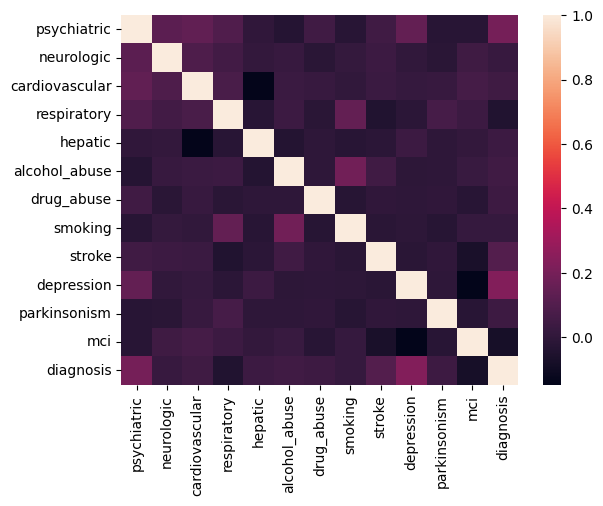

In [34]:
correlation = df_model.corr()
sns.heatmap(df_model.corr())

KNN model

In [35]:
X_train, X_test = train_test_split(X, test_size=0.3, random_state=22, shuffle=False)
y_train, y_test = train_test_split(y, test_size=0.3, random_state=22, shuffle=False)
num_train = len(X_train)
num_test = len(X_test)

In [36]:
# converting the above numpy arrays to pandas dataframe
df_train = pd.DataFrame(X_train)
df_test = pd.DataFrame(X_test)

Plot distribution for each category

In [37]:
# calculate euclidean distance
def dist(x,y):
    return np.sqrt(np.sum((x-y)**2))

In [38]:
# a list to store euclidean distance
train_distance_list = []
# a list to store index
train_ind_counter = []
# a list with all the K values
#k_values = range(15, 55, 5)
k_values = range(35, 40, 1)
# creating a list of list for storing the predictions for each value of K
train_pred_lists = [[] for _ in range(len(k_values))]

# training the knn model
# iterating through the training set
for i in range(num_train):
    train_vec_one = df_train.iloc[i]
    # iterating through the training set
    for j in range(num_train):
        train_vec = df_train.iloc[j]
        # calculate euclidean distance by calling function dist
        euclidean_dist = dist(train_vec_one, train_vec)
        train_distance_list.append(euclidean_dist)
        # increment the index
        train_ind_counter.append(j)

    # dictionary to store all the results
    d = {'index':train_ind_counter, 'distance': train_distance_list}
    # convert dictionary to dataframe
    df = pd.DataFrame(d, columns = ['index', 'distance'])
    # sort in ascending order by euclidean distance
    df_sorted = df.sort_values(by = 'distance')

    # iterate through each value of K
    for K in range(len(k_values)):
        index_list = list(df_sorted['index'][:k_values[K]])
        distance = list(df_sorted['distance'][:k_values[K]])
        res_list = [y_train[i] for i in index_list]
        # now get the count of the max class in result list
        pred_value = max(res_list,key=res_list.count)
        # storing every prediction for K in respective list
        train_pred_lists[K].append(pred_value)

    # reinitialize the list
    train_ind_counter = []
    train_distance_list = []

In [39]:
# a list to store euclidean distance
test_distance_list = []
# a list to store index
test_ind_counter = []
# creating a list of list for storing the predictions for each value of K
test_pred_lists = [[] for _ in range(len(k_values))]

# testing the knn model
# iterating through the test set
for i in range(num_test):
    test_vec = df_test.iloc[i]
    # iterating through the training set
    for j in range(num_train):
        train_vec = df_train.iloc[j]
        # calculate euclidean distance
        euclidean_dist = dist(test_vec,train_vec)
        test_distance_list.append(euclidean_dist)
        # increment the index
        test_ind_counter.append(j)

    # dictionary to store all the results
    d = {'index':test_ind_counter, 'distance': test_distance_list}
    # convert dictionary to dataframe
    df = pd.DataFrame(d, columns = ['index', 'distance'])
    # sort in ascending order by euclidean distance
    df_sorted = df.sort_values(by = 'distance')

    # iterate through each value of K
    for K in range(len(k_values)):
        index_list = list(df_sorted['index'][:k_values[K]])
        distance = list(df_sorted['distance'][:k_values[K]])
        res_list = [train_pred_lists[K][ind] for ind in index_list]
        # now get the count of the max class in result list
        pred_value = max(res_list,key=res_list.count)
        # storing every prediction in respective list
        test_pred_lists[K].append(pred_value)

    # # reinitialize the list
    test_ind_counter = []
    test_distance_list = []

In [40]:
# calculating results for train set
train_pred = 0
train_pred_result = []
for K in range(len(k_values)):
    # element wise comparison to find the accuracy
    for l1,l2 in zip(train_pred_lists[K], y_train.tolist()):
        if l1 == l2:
            # increment when there is a match
            train_pred += 1
    accuracy = train_pred/num_train
    train_pred_result.append((round(accuracy*100,2)))
    print('The train accuracy is '+str(round(accuracy*100,2))+'% for K='+str(k_values[K]))
    train_pred = 0

The train accuracy is 73.85% for K=35
The train accuracy is 74.19% for K=36
The train accuracy is 72.99% for K=37
The train accuracy is 73.85% for K=38
The train accuracy is 73.16% for K=39


In [41]:
# calculating results for test set
test_pred = 0
test_pred_result = []
for K in range(len(k_values)):
    for l1,l2 in zip(test_pred_lists[K], y_test.tolist()):
        if l1 == l2:
            test_pred += 1
    accuracy = test_pred/num_test
    test_pred_result.append((round(accuracy*100,2)))
    print('The test accuracy is '+str(accuracy*100)+'% for K='+str(k_values[K]))
    test_pred = 0

The test accuracy is 74.10358565737052% for K=35
The test accuracy is 73.70517928286853% for K=36
The test accuracy is 74.5019920318725% for K=37
The test accuracy is 74.10358565737052% for K=38
The test accuracy is 74.10358565737052% for K=39


In [42]:
# getting all the results for train and test in a dataframe
df_result = pd.DataFrame()
df_result['K value'] = k_values
df_result['train pred'] = train_pred_result
df_result['test pred'] = test_pred_result
df_result

,K value,train pred,test pred
0,35,73.85,74.10
1,36,74.19,73.71
2,37,72.99,74.50
3,38,73.85,74.10
4,39,73.16,74.10


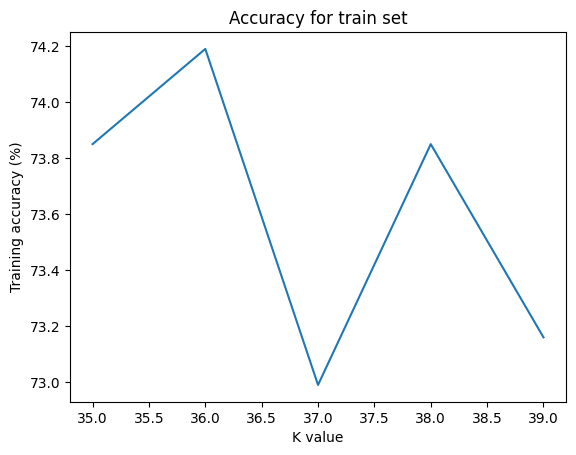

In [43]:
plt.plot(df_result['K value'], df_result['train pred'])
plt.xlabel('K value')
plt.ylabel('Training accuracy (%)')
plt.title('Accuracy for train set')
plt.show()

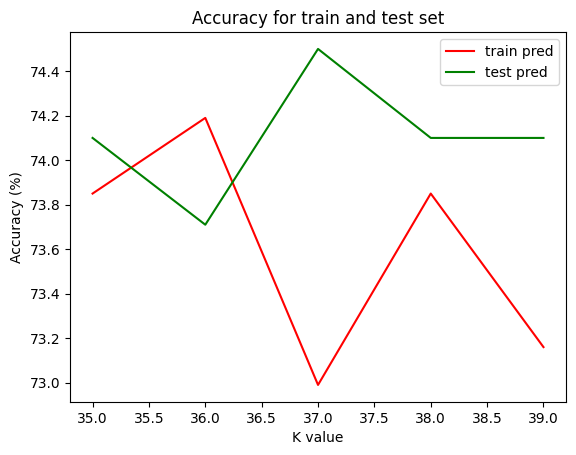

In [44]:
plt.plot(df_result['K value'], df_result['train pred'], 'r', label = 'train pred')
plt.plot(df_result['K value'], df_result['test pred'], 'g', label = 'test pred')
plt.legend(loc='upper right')
plt.xlabel('K value')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy for train and test set')
plt.show()

## Decision Tree

In [45]:
from io import StringIO
from sklearn import tree
import pydot
from IPython.core.display import Image, display

In [46]:
dt_result = []
for v in range(2, 15, 2):
  dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=10, max_depth=v)
  dt.fit(X_train, y_train)
  print ('Accuracy:', dt.score(X_test, y_test))
  dt_result.append(dt.score(X_test, y_test))


Accuracy: 0.6135458167330677
Accuracy: 0.749003984063745
Accuracy: 0.7848605577689243
Accuracy: 0.7848605577689243
Accuracy: 0.7729083665338645
Accuracy: 0.7649402390438247
Accuracy: 0.7649402390438247


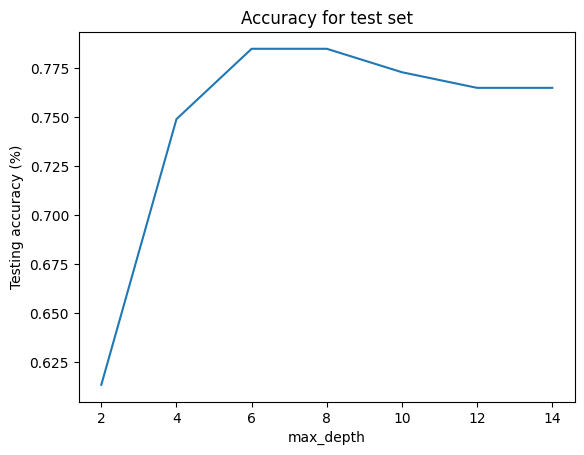

In [47]:
plt.plot(range(2, 15, 2), dt_result)
plt.xlabel('max_depth')
plt.ylabel('Testing accuracy (%)')
plt.title('Accuracy for test set')
plt.show()

Accuracy: 0.7848605577689243


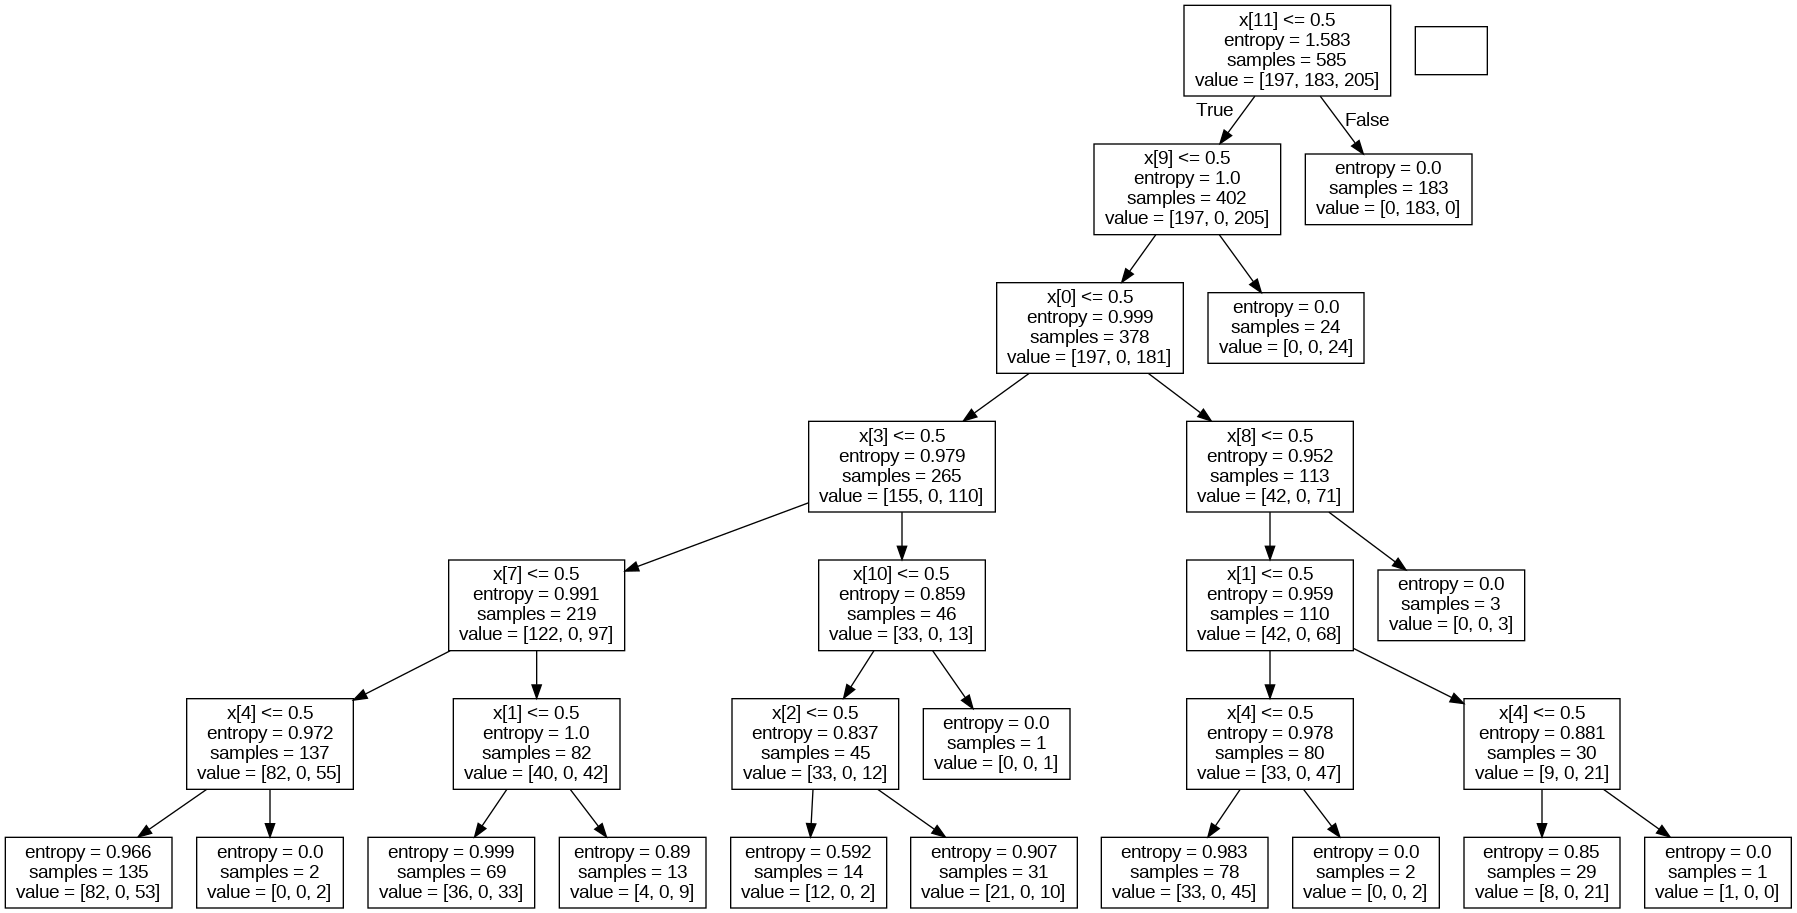

In [48]:
# Train a decision tree classifier.
dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=10, max_depth=6)
dt.fit(X_train, y_train)
print ('Accuracy:', dt.score(X_test, y_test))

dot_data = StringIO()
tree.export_graphviz(dt, out_file=dot_data)
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]
Image(graph.create_png())

Change max_depth for highest accuracy

Random forest

In [49]:
rf_acc = []
for d in range(5, 50, 5):
  classifier = RandomForestClassifier(n_estimators = d, criterion = 'entropy', random_state = 0, max_depth =6)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  rf_acc.append(accuracy)

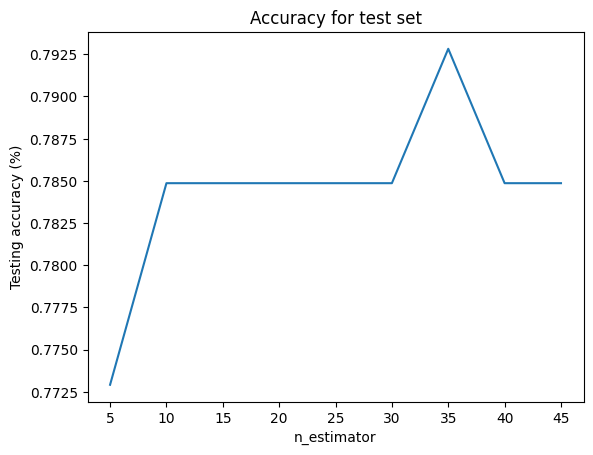

In [50]:
plt.plot(range(5, 50, 5), rf_acc)
plt.xlabel('n_estimator')
plt.ylabel('Testing accuracy (%)')
plt.title('Accuracy for test set')
plt.show()

In [51]:
np.max(rf_acc)

0.7928286852589641

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score

In [53]:
f1_score(y_test, y_pred, average='weighted')

0.7956755412863185

In [59]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)

0.6779117748692176

Kernel SVM

In [55]:
classifier = SVC(kernel = "rbf", random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7848605577689243

Naive Bayes

In [56]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6254980079681275

SVM

In [57]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7529880478087649

Logisitc Regression

In [58]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7649402390438247